# Car Price Prediction Project

In this project, we will use the **Random Forest Regressor** model to predict car prices based on a dataset containing information about cars such as **car name**, **engine type**, **car body**, and others.

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

## Step 1: Loading the Data

In this step, we will load the data from a CSV file containing car information and their prices.
m

In [16]:
car_prices_data=pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")

## Step 2: undersatanding the Data and some cleaning


In [4]:
car_prices_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
duplicated_rows= car_prices_data[car_prices_data.duplicated()]
print (f"the duplicated rows are {duplicated_rows.shape[0]}")
print(car_prices_data.isnull().sum())

the duplicated rows are 0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [17]:
car_prices_data["company name "] = car_prices_data["CarName"].str.split().str[0]

In [18]:
print(car_prices_data["company name "])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company name , Length: 205, dtype: object


In [19]:
car_prices_data.drop(columns='CarName', inplace=True)
car_prices_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
print(car_prices_data["company name "].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [21]:
def replace(a,b):
    car_prices_data["company name "] = car_prices_data["company name "].replace(a, b)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

## Step 3: using OneHotEncoding to convert non-numeric columns into numeric ones

In [22]:
object_columns = car_prices_data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(car_prices_data[object_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(object_columns))
car_prices_data_numeric=pd.concat([car_prices_data, one_hot_df],axis = 1).drop(columns=object_columns)


## Step 3: Splitting the Data into Training and Testing Sets

In this step, we will split the data into training and testing sets. The training set will be used to train the model, while the testing set will allow us to evaluate the model's performance.
We will use 75% of the data for training and 25% for testing.


In [23]:
y = car_prices_data_numeric["price"]
x = car_prices_data_numeric.drop(["price"], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25 , random_state=42)

## Step 4: Training the Random Forest Model

Now that we have split the data into training and testing sets, we will train a **Random Forest Regressor** model on the training data. Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy of predictions.


In [24]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

## Step 5: Predicting Car Prices

After training the model, we will use it to predict car prices for the testing set. The model will output predicted prices based on the features of the cars in the test data.

In [25]:
y_pred_rf= rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error (MSE) for Random Forest: {mse_rf}')
print(f'R-squared (R2) for Random Forest: {r2_rf}')

Mean Squared Error (MSE) for Random Forest: 3994101.654516711
R-squared (R2) for Random Forest: 0.9409676471549743


## Step 6: Comparing Results Using Visualizations

To evaluate the model's performance, we will compare the true prices (from the test set) with the predicted prices using a plot. This will help us visually understand how well the model is performing.


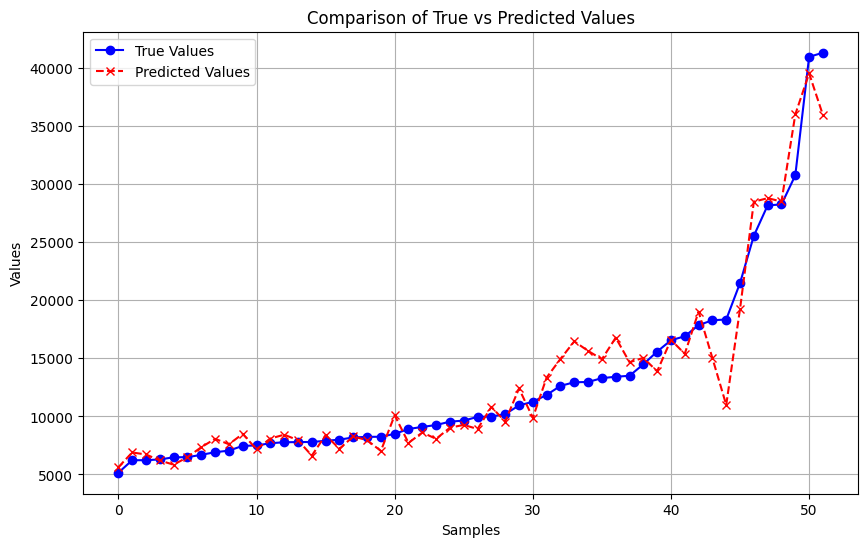

In [26]:
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = y_pred_rf[sorted_indices]
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(y_pred_sorted, label='Predicted Values', marker='x', linestyle='--', color='red')

plt.title('Comparison of True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)